In [2]:
import numpy as np

In [3]:
weights = np.random.rand(35, 35, 784)

In [4]:
weights.shape

(35, 35, 784)

In [5]:
x_indices, y_indices = np.meshgrid(np.arange(35), np.arange(35), indexing='ij')


In [6]:
np.meshgrid(np.arange(35), np.arange(35), indexing='ij')



[array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [32, 32, 32, ..., 32, 32, 32],
        [33, 33, 33, ..., 33, 33, 33],
        [34, 34, 34, ..., 34, 34, 34]]),
 array([[ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        ...,
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34]])]

In [7]:
#mix x_indices and y_indices
np.stack([x_indices, y_indices], axis=-1)

array([[[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        ...,
        [ 0, 32],
        [ 0, 33],
        [ 0, 34]],

       [[ 1,  0],
        [ 1,  1],
        [ 1,  2],
        ...,
        [ 1, 32],
        [ 1, 33],
        [ 1, 34]],

       [[ 2,  0],
        [ 2,  1],
        [ 2,  2],
        ...,
        [ 2, 32],
        [ 2, 33],
        [ 2, 34]],

       ...,

       [[32,  0],
        [32,  1],
        [32,  2],
        ...,
        [32, 32],
        [32, 33],
        [32, 34]],

       [[33,  0],
        [33,  1],
        [33,  2],
        ...,
        [33, 32],
        [33, 33],
        [33, 34]],

       [[34,  0],
        [34,  1],
        [34,  2],
        ...,
        [34, 32],
        [34, 33],
        [34, 34]]])

In [8]:
distances = np.linalg.norm(weights - 784, axis=-1)
med = np.unravel_index(np.argmin(distances), distances.shape)

In [9]:
med

(17, 2)

In [10]:
distances = np.sqrt((x_indices - med[0]) ** 2 + (y_indices - med[1]) ** 2)

influences = np.exp(-np.power(distances, 2) / 2 * 0.5)

In [11]:
influences.shape

(35, 35)

In [12]:
distances

array([[17.11724277, 17.02938637, 17.        , ..., 34.4818793 ,
        35.35533906, 36.23534186],
       [16.1245155 , 16.03121954, 16.        , ..., 34.        ,
        34.88552709, 35.77708764],
       [15.13274595, 15.03329638, 15.        , ..., 33.54101966,
        34.43835072, 35.34119409],
       ...,
       [15.13274595, 15.03329638, 15.        , ..., 33.54101966,
        34.43835072, 35.34119409],
       [16.1245155 , 16.03121954, 16.        , ..., 34.        ,
        34.88552709, 35.77708764],
       [17.11724277, 17.02938637, 17.        , ..., 34.4818793 ,
        35.35533906, 36.23534186]])

In [13]:
influences[:, :, np.newaxis].shape

(35, 35, 1)

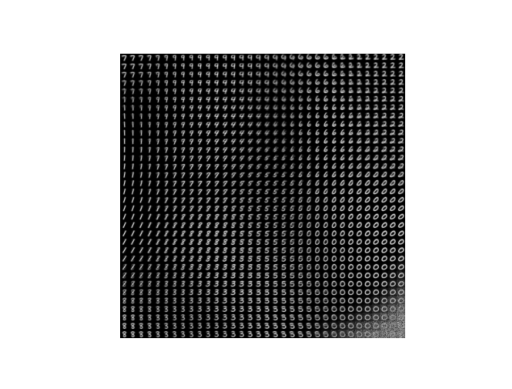

In [82]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from IPython.display import HTML

# Directory containing the PNG files
image_dir = 'src/Self_Organizing_Maps/images'

# List of image file paths
image_files = [os.path.join(image_dir, file) for file in sorted(os.listdir(image_dir)) if file.endswith('.png')]

# Load the images into a list
images = [Image.open(image_file) for image_file in image_files]

# Create a figure
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Initialize the plot with the first image
im = ax.imshow(images[0])

# Update function for the animation
def update(frame):
    im.set_array(images[frame])
    return [im]

# Create the animation and assign it to a variable
ani = animation.FuncAnimation(fig, update, frames=len(images), interval=1000, repeat=True)

# Display the animation in the notebook
HTML(ani.to_jshtml())

In [15]:
from src.Self_Organizing_Maps.model import SOM

som2 = SOM(34, 34, 784)

# Create a new SOM instance
som2.load_weights(file_path="src/Self_Organizing_Maps/models/model_34_34_1.0_20_0.2.npy")

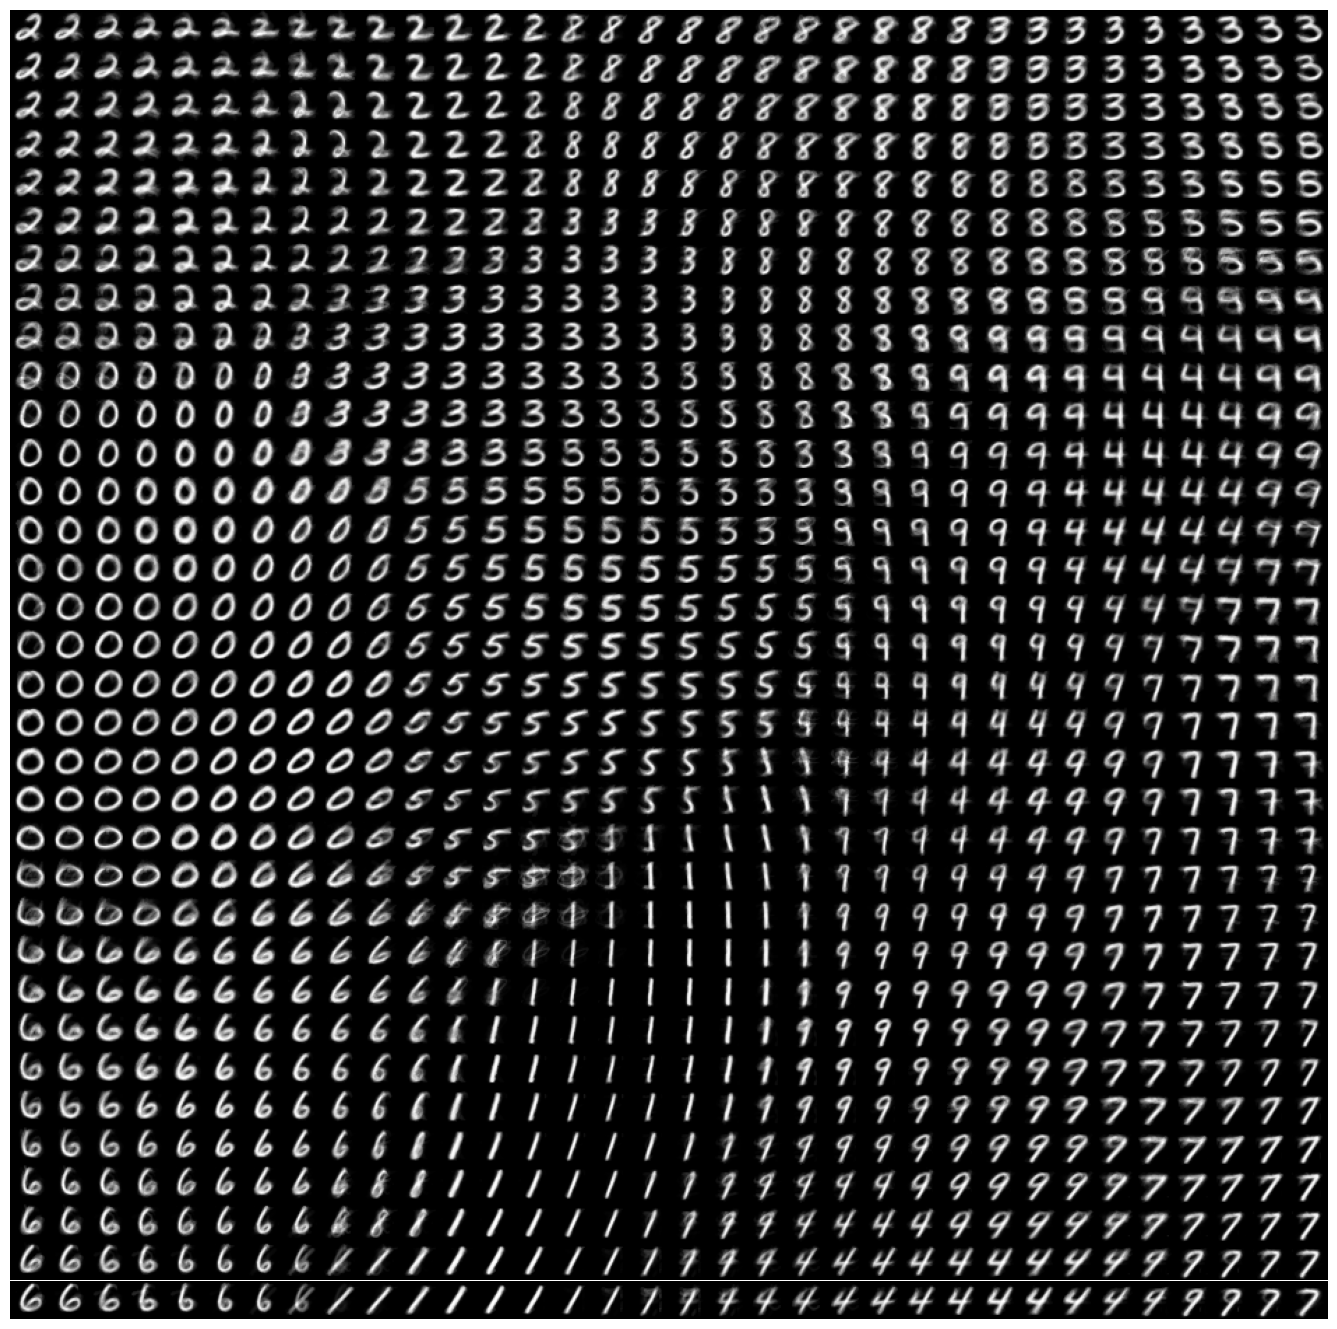

In [134]:
#plot the matrix of weigts with image of digits
fig, ax = plt.subplots(34, 34, figsize=(17, 17))

for i in range(34):
    for j in range(34):
        ax[i, j].imshow(som2.weights[i, j].reshape(28, 28), cmap='gray')
        ax[i, j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [16]:
from src.dataset.dataset_mnist import mnistData

mnist_dataset = mnistData()

X_train = mnist_dataset.getTrainX()
Y_train = mnist_dataset.getTrainY()

2024-06-27 12:24:28.196269: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 12:24:28.820878: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 12:24:29.906313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dopehat54/miniconda3/envs/torch/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


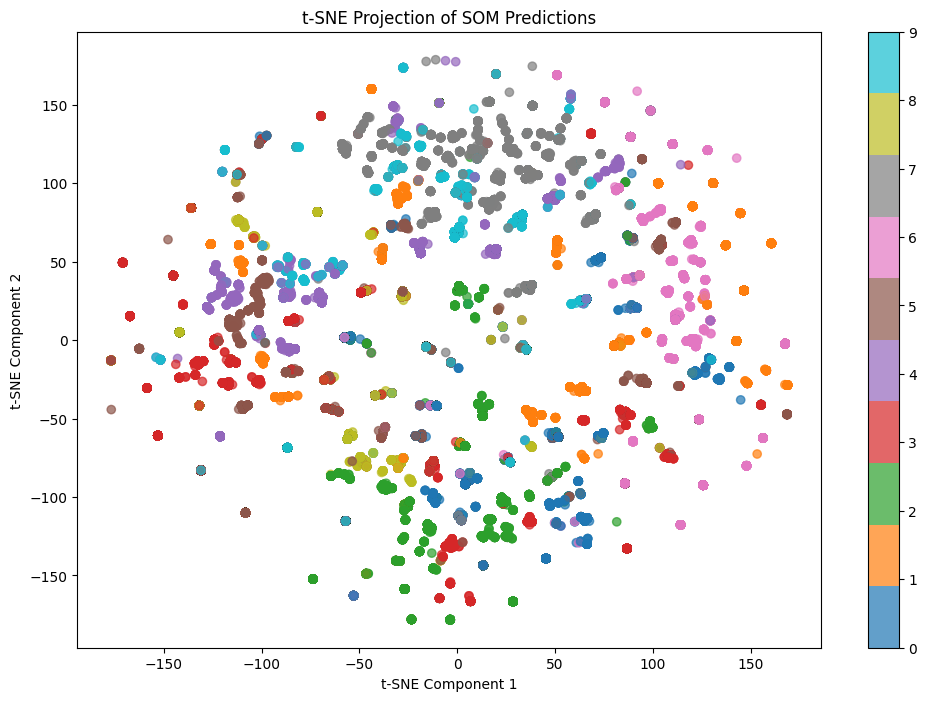

In [18]:
from sklearn.manifold import TSNE

# Function to get BMU indices for the dataset
def get_bmu_indices(som, data):
    bmu_indices = []
    for sample in data:
        bmu = som.min_euc_distance(sample.flatten())
        bmu_indices.append(bmu)
    return np.array(bmu_indices)

# Get BMU indices for the training data
bmu_indices = get_bmu_indices(som2, X_train)

# Flatten the BMU indices to use them as input for t-SNE
bmu_flat = bmu_indices.reshape(len(bmu_indices), -1)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(bmu_flat)

# Plot the t-SNE projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_train, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Projection of SOM Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/tmp/ipykernel_205157/3987519678.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(bmu_label[:, 1] + 0.5, bmu_label[:, 0] + 0.5, s=5, label=str(label), cmap='tab10', alpha=0.7)


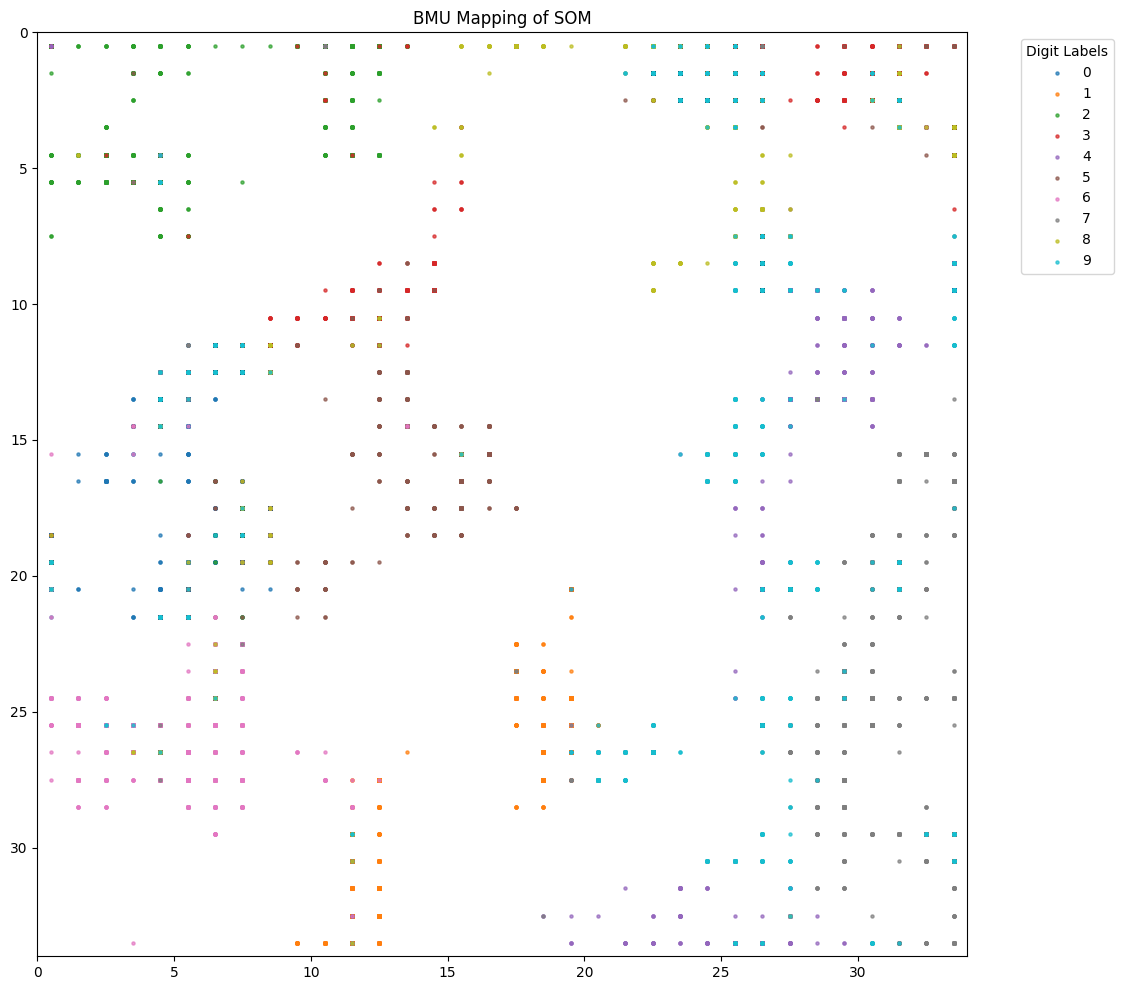

In [26]:
# Plot the BMU mapping with colored markers and legend
def plot_bmu_mapping(som, bmu_indices, labels):
    plt.figure(figsize=(12, 12))
    scatter_plots = []
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        indices = np.where(labels == label)
        bmu_label = bmu_indices[indices]
        scatter = plt.scatter(bmu_label[:, 1] + 0.5, bmu_label[:, 0] + 0.5, s=5, label=str(label), cmap='tab10', alpha=0.7)
        scatter_plots.append(scatter)
    
    plt.xlim(0, som.y)
    plt.ylim(0, som.x)
    plt.gca().invert_yaxis()
    plt.title('BMU Mapping of SOM')
    plt.legend(title='Digit Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_bmu_mapping(som2, bmu_indices, Y_train)

/tmp/ipykernel_205157/911271261.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(bmu_label[:, 1], bmu_label[:, 0], s=5, label=str(label), cmap='tab10', alpha=0.7)


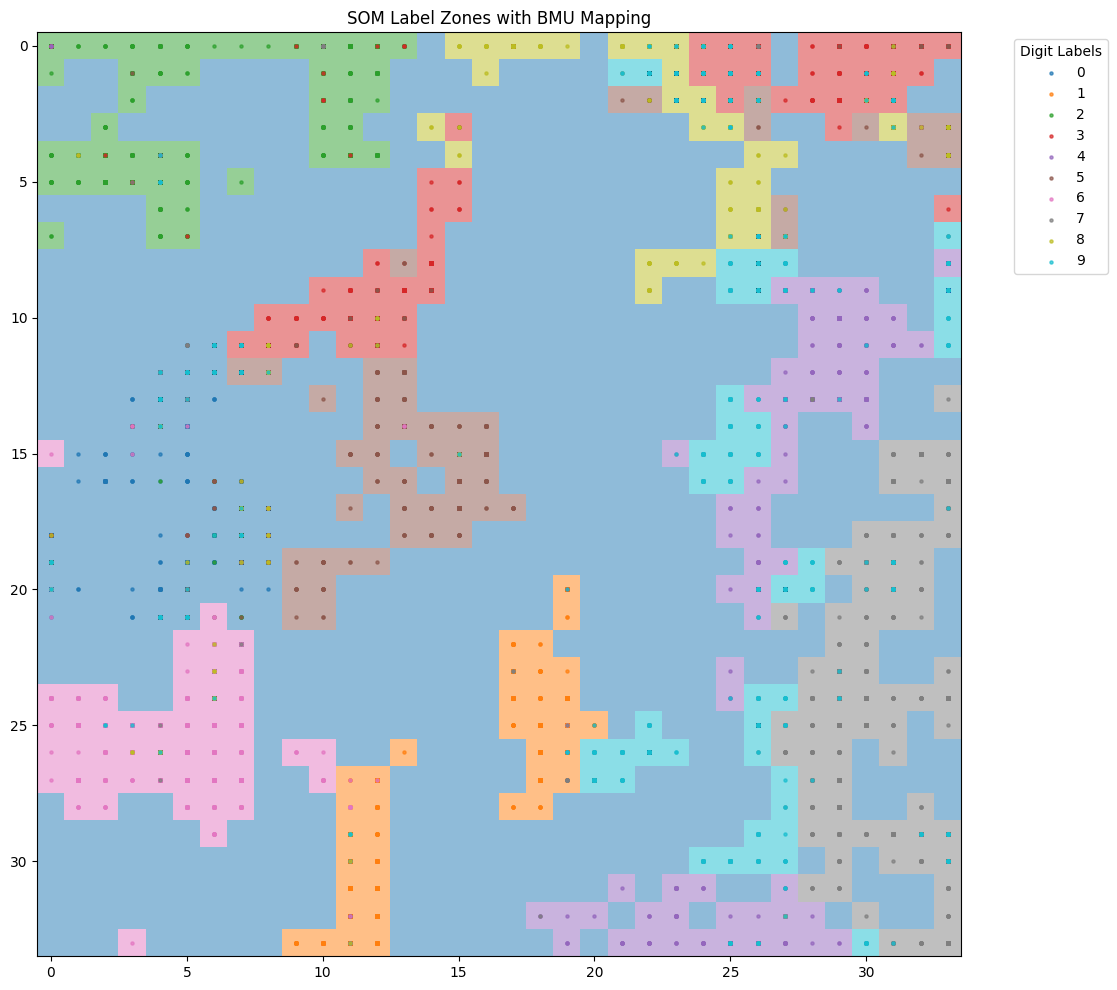

In [27]:
# Function to create the label grid
from matplotlib.colors import ListedColormap

def create_label_grid(som, bmu_indices, labels):
    label_grid = np.zeros((som.x, som.y))
    counts = np.zeros((som.x, som.y, 10))  # Assuming 10 labels for digits 0-9

    for bmu, label in zip(bmu_indices, labels):
        counts[bmu[0], bmu[1], label] += 1
    
    label_grid = np.argmax(counts, axis=2)
    return label_grid

# Get BMU indices for the training data
bmu_indices = get_bmu_indices(som2, X_train)

# Create the label grid
label_grid = create_label_grid(som2, bmu_indices, Y_train)

# Plot the label grid
def plot_label_grid(label_grid, bmu_indices, labels):
    plt.figure(figsize=(12, 12))
    cmap = ListedColormap(plt.cm.tab10.colors[:10])
    plt.imshow(label_grid, cmap=cmap, alpha=0.5, origin='upper')
    
    for label in np.unique(labels):
        indices = np.where(labels == label)
        bmu_label = bmu_indices[indices]
        plt.scatter(bmu_label[:, 1], bmu_label[:, 0], s=5, label=str(label), cmap='tab10', alpha=0.7)
    
    plt.xlim(-0.5, label_grid.shape[1] - 0.5)
    plt.ylim(-0.5, label_grid.shape[0] - 0.5)
    plt.gca().invert_yaxis()
    plt.title('SOM Label Zones with BMU Mapping')
    plt.legend(title='Digit Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_label_grid(label_grid, bmu_indices, Y_train)

In [19]:
bmu_flat

array([[ 0, 25],
       [20,  5],
       [ 8, 33],
       ...,
       [15, 16],
       [23,  7],
       [ 0, 22]])

In [201]:
choice = 80

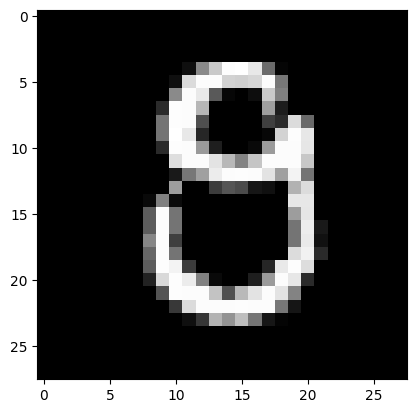

In [202]:
plt.imshow(X_train[choice].reshape(28, 28), cmap='gray')

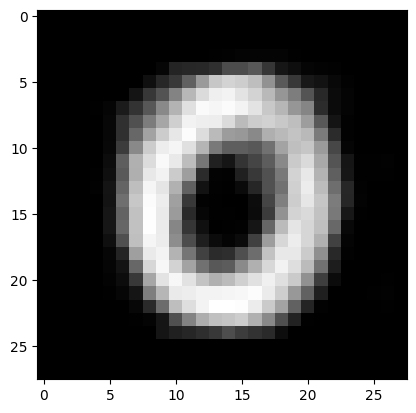

In [203]:
# Get the best-matching unit for the first training sample

bmu = som2.min_euc_distance(X_train[choice].flatten()) 
# Plot the best-matching unit
plt.imshow(som2.weights[bmu[0], bmu[1]].reshape(28, 28), cmap='gray')
plt.show()

In [156]:
+bmu

(13, 4)

AttributeError: 'NoneType' object has no attribute 'mean'

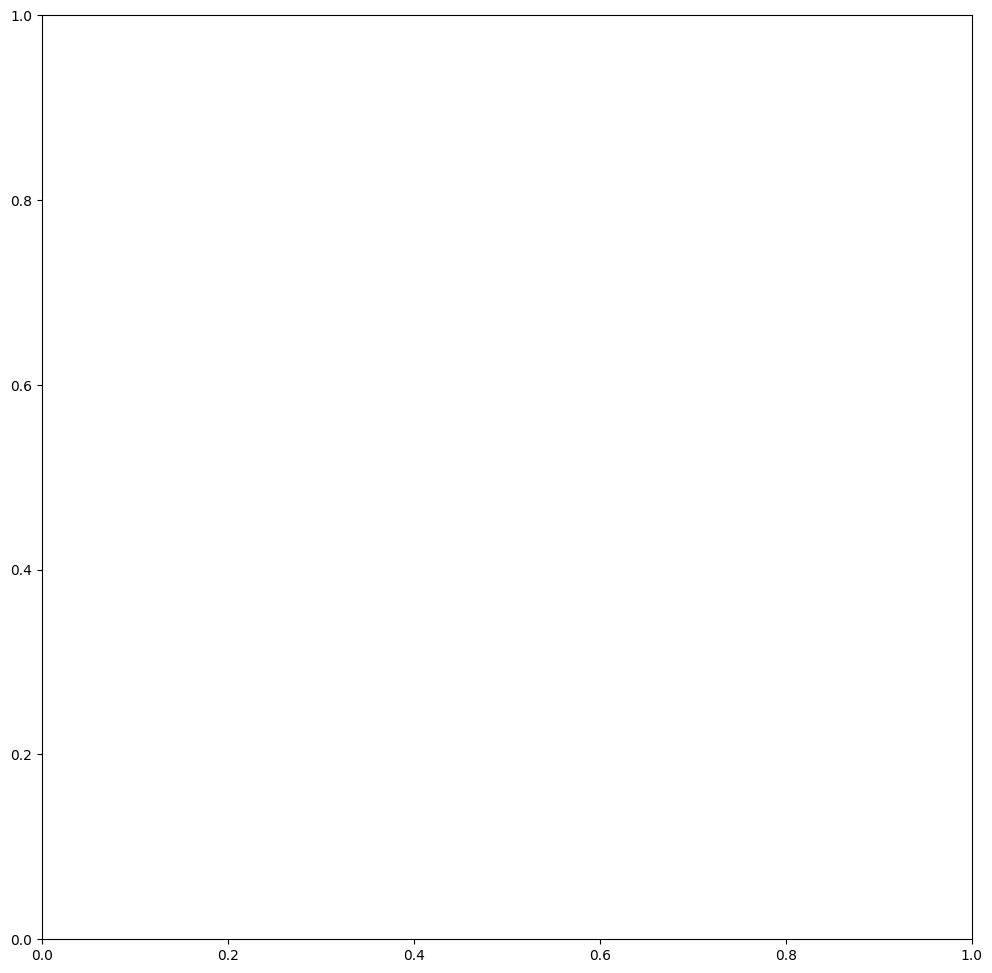

In [49]:
def plot_weights(weights):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.matshow(weights.mean(axis=2), cmap='viridis')  # Display the average weight per neuron as an image

    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            # Use the sum of the weights as a placeholder for the digit
            # Replace this with the actual digit if available
            weight_sum = np.sum(weights[i, j])
            ax.text(j, i, f'{weight_sum:.2f}', ha='center', va='center', color='white')

    plt.show()

# Plot the weights
plot_weights(som.weights)

In [84]:
from src.Self_Organizing_Maps.model import SOM

som = SOM(34, 34, 784)

# Create a new SOM instance
som.load_weights(file_path="src/Self_Organizing_Maps/models/model_34_34_7_20_0.02.npy")

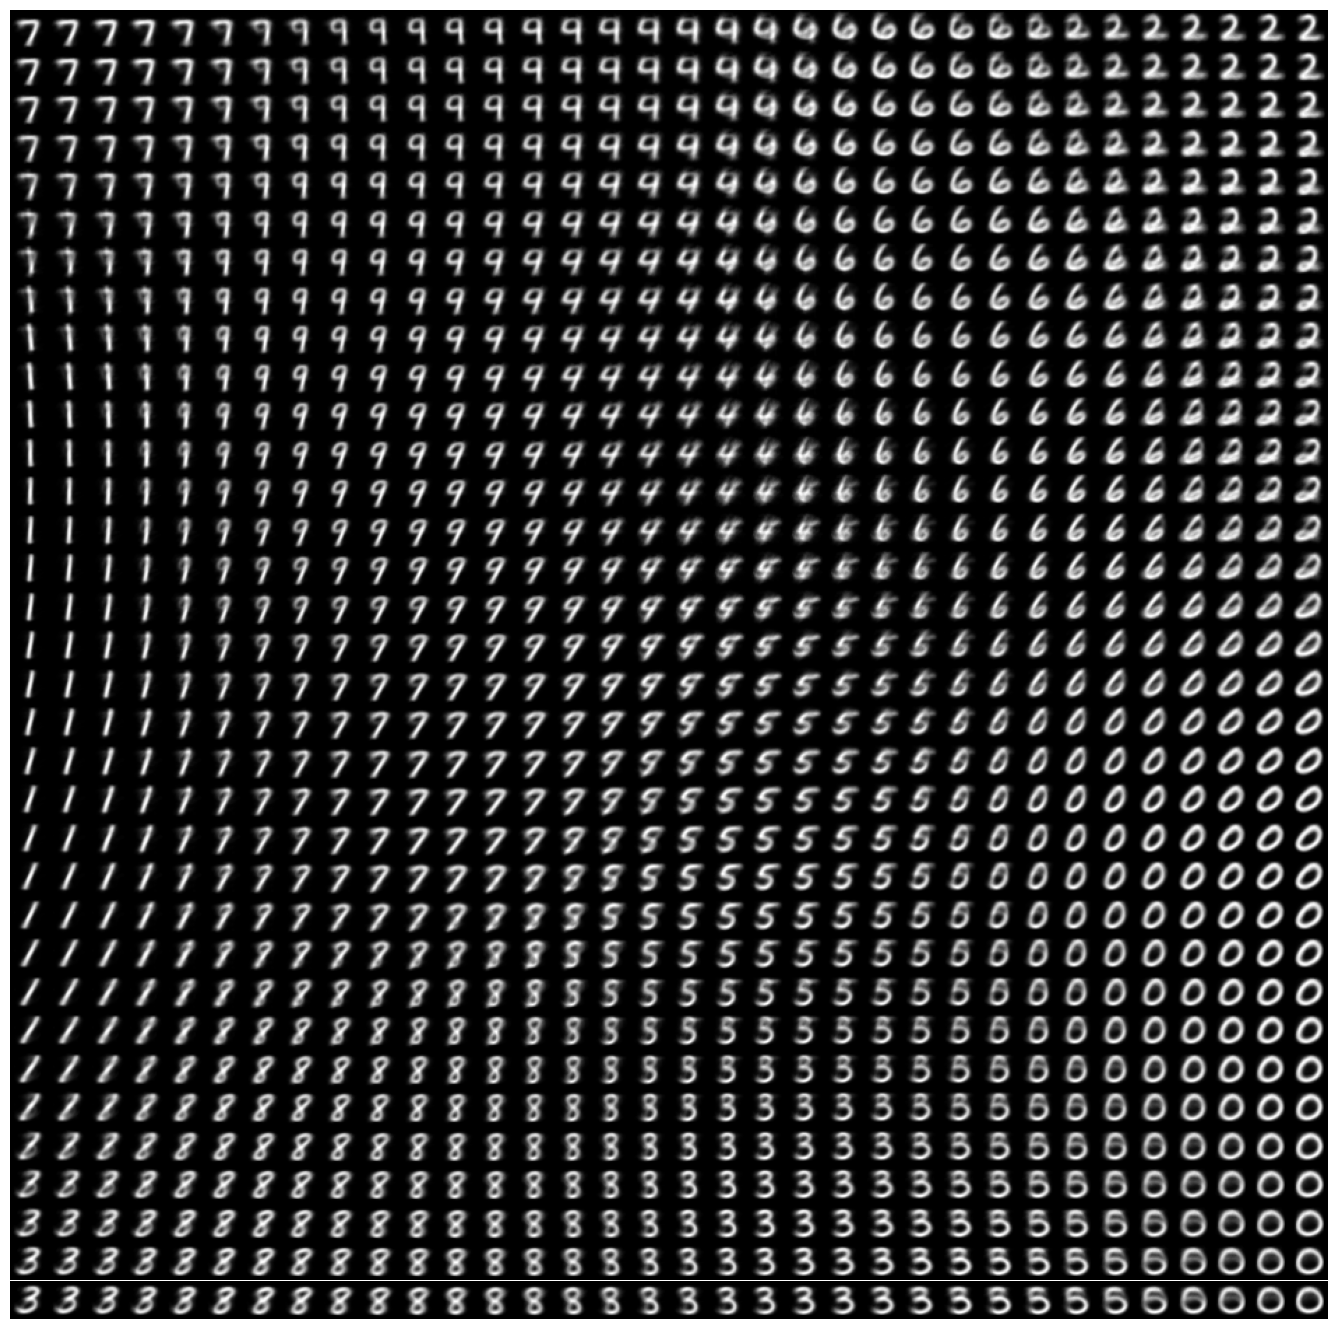

In [85]:
#plot the matrix of weigts with image of digits
fig, ax = plt.subplots(34, 34, figsize=(17, 17))

for i in range(34):
    for j in range(34):
        ax[i, j].imshow(som.weights[i, j].reshape(28, 28), cmap='gray')
        ax[i, j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

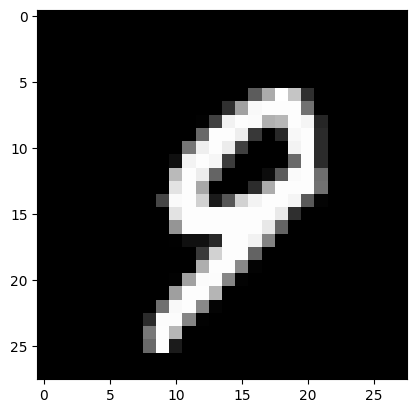

In [137]:
choice = 589
plt.imshow(X_train[choice].reshape(28, 28), cmap='gray')

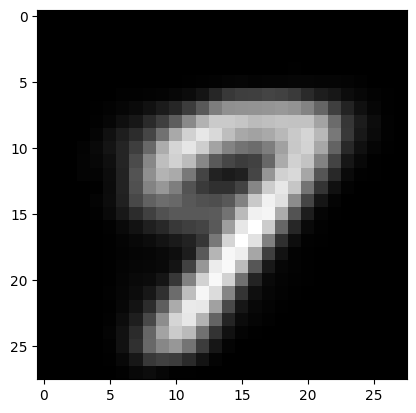

In [138]:
# Get the best-matching unit for the first training sample

bmu = som.min_euc_distance(X_train[choice].flatten()) 
# Plot the best-matching unit
plt.imshow(som.weights[bmu[0], bmu[1]].reshape(28, 28), cmap='gray')
plt.show()

In [136]:
from sklearn.manifold import TSNE

# Function to get BMU indices for the dataset
def get_bmu_indices(som, data):
    bmu_indices = []
    for sample in data:
        bmu = som.min_euc_distance(sample.flatten())
        bmu_indices.append(bmu)
    return np.array(bmu_indices)

# Get BMU indices for the training data
bmu_indices = get_bmu_indices(som, X_train)

KeyboardInterrupt: 

/tmp/ipykernel_205157/193276010.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(bmu_label[:, 1] + 0.5, bmu_label[:, 0] + 0.5, s=5, label=str(label), cmap='tab10', alpha=0.7)


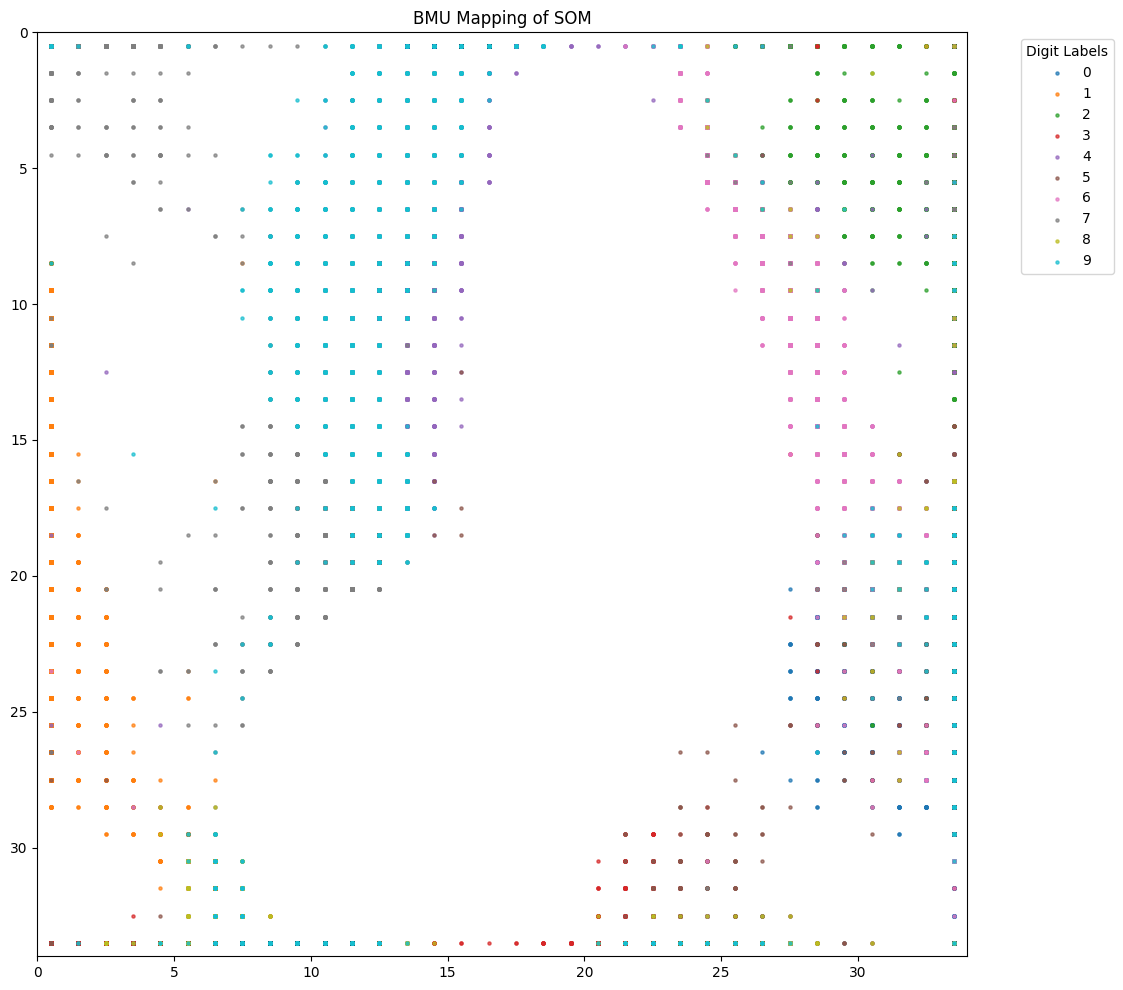

In [89]:
# Plot the BMU mapping with colored markers and legend
def plot_bmu_mapping(som, bmu_indices, labels):
    plt.figure(figsize=(12, 12))
    scatter_plots = []
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        indices = np.where(labels == label)
        bmu_label = bmu_indices[indices]
        scatter = plt.scatter(bmu_label[:, 1] + 0.5, bmu_label[:, 0] + 0.5, s=5, label=str(label), cmap='tab10', alpha=0.7)
        scatter_plots.append(scatter)
    
    plt.xlim(0, som.y)
    plt.ylim(0, som.x)
    plt.gca().invert_yaxis()
    plt.title('BMU Mapping of SOM')
    plt.legend(title='Digit Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_bmu_mapping(som, bmu_indices, Y_train)

In [1]:
from src.dataset.dataset_pokemon import PokemonData

pokemon_dataset = PokemonData(image_size=(32, 32))

X_train = pokemon_dataset.getTrainX()
Y_train = pokemon_dataset.getTrainY()
X_test = pokemon_dataset.getTestX()
Y_test = pokemon_dataset.getTestY()

/home/dopehat54/miniconda3/envs/torch/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [2]:
X_train.shape

(2199, 32, 32, 3)

In [143]:
X_train[0].shape

(32, 32, 3)

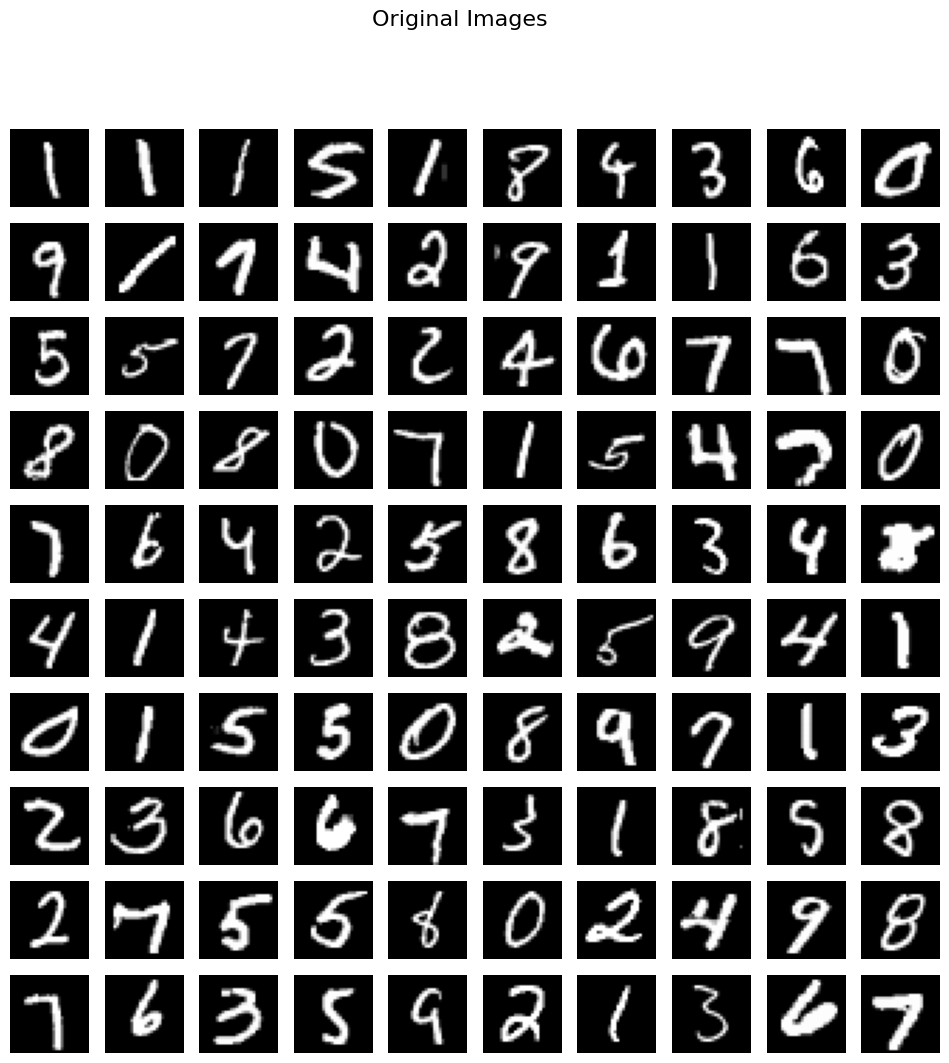

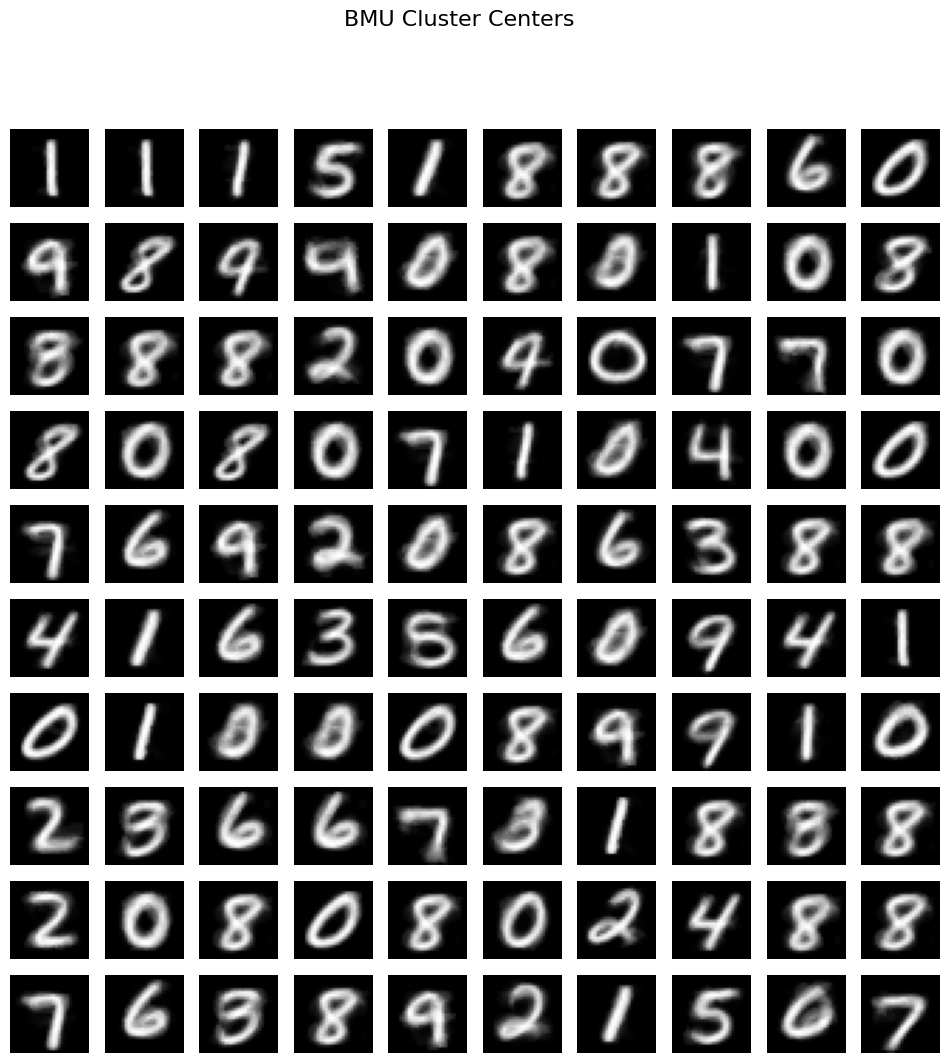

In [140]:
#make a plot of 100 images from the dataset and compare with the cluster centers using bmu

num_images = 100

# Choose random indices for the images
indices = np.random.choice(len(X_train), num_images, replace=False)

# Create a figure for the original images
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle('Original Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    image = X_train[indices[i]].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# Create a figure for the BMU cluster centers
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle('BMU Cluster Centers', fontsize=16)

for i, ax in enumerate(axes.flat):
    bmu = som2.min_euc_distance(X_train[indices[i]].flatten())
    bmu_image = som2.weights[bmu[0], bmu[1]].reshape(28, 28)
    ax.imshow(bmu_image, cmap='gray')
    ax.axis('off')

plt.show()

In [6]:
import numpy as np
centroids = X_train.reshape(2, -1)[np.random.choice(2, 5)]

(5, 3377664)